In [10]:
import random
import utils
import numpy as np
import matplotlib.pyplot as plt

# Agent class definition

## Q-Learning Agent

In [11]:
class QAgent():
    qtable=[]
 # Agent class definition   state=None
    learning_rate=0.1
    
    state=None #0-5
    
    actions=[]
    state_number=6
    
    perf=[]
    
    def __init__(self):
        #qtable creation
        self.qtable=np.zeros((self.state_number,len(game.actions)))
        self.perf=[]
        
    #allow to print leduc game state
    def __str__(self):
        return "State = {} \nQTable = {} \nLearning rate = {}".format(self.state,self.qtable,self.learning_rate)
    
    def explore_action(self):
        action=random.randrange(0,2)
        return action
    
    def exploit_action(self):
        action=utils.get_max_list(self.qtable[self.state])
        return action
    
    def set_state(self, state):
        self.state=state
        
    def set_qtable(self,qtable):
        self.qtable=qtable
        
    def set_perf(self,perf):
        self.perf.append(perf)

    def update(self,action,reward):
        if(self.state!=-1):
            new_value = (1 - self.learning_rate) * self.qtable[self.state, action] +  self.learning_rate * reward
            self.qtable[self.state, action] = new_value

## Random Agent

In [12]:
class RandAgent():
    
    action=None
           
        
    def __init__(self):
        #qtable creation
        self.set_action(0)
        
    def set_action(self,hand):
        self.action=random.randrange(0,2)
        
    def get_action(self):
        return self.action

## Naive Agent

In [13]:
class NaiveAgent():
    
    action=None
        
    def set_action(self,hand):
        
        if(hand==0):
            self.action=0
        elif(hand==2):
            self.action=1
        else:
            self.action=random.randrange(0,2)
        
    def get_action(self):
        return self.action

# LeducGame class definition

In [14]:
class LeducGame:
    deck = []
    actions = [0,1] #0 is fold and 1 is push
    firstplayer=None; #0 if player1 and 1 if player2
    hand_player1=0;
    hand_player2=0;
    boardcard=0;
    result=0;
    
    #inititate a game
    def __init__(self):
        self.deck = [0,0,1,1,2,2]
        
        #deal card to game from deck
        self.hand_player1=utils.choose_and_remove(self.deck)
        self.hand_player2=utils.choose_and_remove(self.deck)
        self.boardcard=utils.choose_and_remove(self.deck)
        self.result=self.get_result()
        self.firstplayer=random.randrange(0,2)
        
    #allow to print leduc game state
    def __str__(self):
        return "Player1 = {} \nPlayer2 = {} \nBoard = {} \nDeck = {}\nResult = {}".format(self.hand_player1,self.hand_player2,self.boardcard,self.deck, self.result)
     
    def get_firstplayer(self):
            return self.firstplayer
        
    def get_hand_player1(self):
            return self.hand_player1
    
    def get_hand_player2(self):
            return self.hand_player2
    
    #result() : 
    # 0  -> draw
    # 1  -> player1 win
    #-1  -> player2 win
    
    def get_result(self):
        #Pairs
        if (self.hand_player1==self.boardcard):
            result=1
        elif (self.hand_player2==self.boardcard):
            result=-1
        #Highest card
        elif (self.hand_player1>self.hand_player2):
            result=1
        elif(self.hand_player1<self.hand_player2):
            result=-1
        #Draw
        else:
            result=0
        return result        

# Testing LeducGame

In [15]:
game=LeducGame()
print(game)

Player1 = 2 
Player2 = 1 
Board = 0 
Deck = [0, 1, 2]
Result = 1


# Environment

In [16]:
class Environment:
    agent=None
    game=None
    stack=None
    
    def __init__(self,agent):
        self.game=LeducGame()
        self.agent=agent
        self.stack=10
        self.agent.set_action(self.game.get_hand_player2())
        self.opponent_action=self.agent.get_action()
        
        
    def __str__(self):
        return "{} \nOpponent_Action = {}\nStack = {}".format(self.game,self.agent.get_action(),self.stack)
    
    def get_state(self):
        hand1=self.game.get_hand_player1()
        first=self.game.get_firstplayer()
        
        if first is 0:
            return hand1
        elif(first==1 and self.opponent_action==1):
            return hand1+3
        else:
            return -1
        
    def reward(self,qagent_action,state):
        r=0
        
        if(qagent_action==0):
            r=-0.1*self.stack
        elif(self.opponent_action==0):
            r=0.1*self.stack
        elif(qagent_action==1 and self.opponent_action==1):
            if(self.game.get_result()==1):
                r=self.stack
            elif(self.game.get_result()==-1):
                r=-self.stack

        return r
    
    def reset(self):
        self.game=LeducGame() 
        self.stack=10
        self.agent.set_action(self.game.get_hand_player2())
        self.opponent_action=self.agent.get_action()
        
    def test(self,n):
        r=0
        for i in range(n):
            r=r+self.reward(self,qagent_action,state) 
            self.reset() 
        r=r/n
        return r
            

# Training and Testing parameters

In [17]:
epochs_number=1000
evaluate_every=30
test_number=10000

## QAgent VS RandAgent

In [21]:
randAgent=RandAgent()

env=Environment(randAgent)
envTest=Environment(randAgent)
qagent=QAgent()

for i in range(epochs_number): 
    #test
    if(i % evaluate_every == 0):
        r=0
        for j in range(test_number):
            envTest.reset()
            qagent.set_state(envTest.get_state())
            test_qagent_action=qagent.exploit_action()
            r=r+envTest.reward(test_qagent_action,envTest.get_state())
        perf=float(r/test_number)
        qagent.set_perf(perf)
    
    env.reset()
    qagent.set_state(env.get_state())
    qagent_action=qagent.explore_action()
    reward=env.reward(qagent_action,env.get_state())
    qagent.update(qagent_action,reward)
    
print(qagent.qtable)

[[-0.99985666 -2.86020705]
 [-0.99985666  2.34901322]
 [-0.99982304  4.43117137]
 [-0.98922474  0.39588602]
 [-0.99293035 -0.28116889]
 [-0.99484622  3.73727596]]


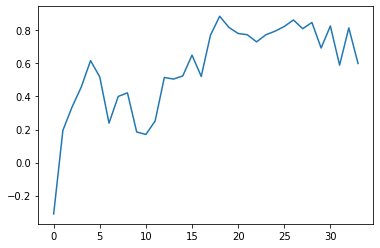

In [22]:
plt.plot(qagent.perf)

## QAgent VS NaiveAgent

In [23]:
naiveAgent=NaiveAgent()

env=Environment(naiveAgent)
envTest=Environment(naiveAgent)
qagent=QAgent()

for i in range(epochs_number): 
    #test
    if(i % evaluate_every == 0):
        r=0
        for j in range(test_number):
            envTest.reset()
            qagent.set_state(envTest.get_state())
            test_qagent_action=qagent.exploit_action()
            r=r+envTest.reward(test_qagent_action,envTest.get_state())
        perf=float(r/test_number)
        qagent.set_perf(perf)
    
    env.reset()
    qagent.set_state(env.get_state())
    qagent_action=qagent.explore_action()
    reward=env.reward(qagent_action,env.get_state())
    qagent.update(qagent_action,reward)
    
print(qagent.qtable)

[[-0.99987099 -3.2197588 ]
 [-0.99987099  0.80916805]
 [-0.99991536  2.81824942]
 [-0.9962429  -3.85601537]
 [-0.96566316 -5.07754434]
 [-0.96184796  0.81998874]]


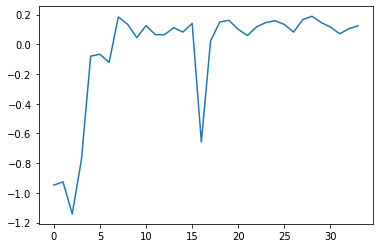

In [24]:
plt.plot(qagent.perf)